# **SEMINAR 4**

First of all we load the datasets and check if it was done successfully

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Define paths to your data files
train_path = '/content/drive/MyDrive/AAX/Sem4/train_data.csv'
test_path = '/content/drive/MyDrive/AAX/Sem4/test_data.csv'

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Preview datasets
print("Train data:")
display(train_df.head())

print("Test data:")
display(test_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data:


,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
0,2,-72.32,163.11,118.36,1,13.51,51.79
1,32,-73.18,238.45,212.83,1,3.35,68.80
2,20,-40.67,865.44,863.39,1,17.62,50.79
3,10,-60.66,473.89,396.92,1,14.30,64.15
4,29,-67.96,479.74,355.99,1,4.81,73.81


Test data:


,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
0,16,-53.19,787.51,653.48,1,15.94,56.30
1,24,-62.79,657.90,592.37,1,17.31,49.78
2,34,-71.16,259.18,178.29,0,2.89,55.83
3,28,-63.99,467.56,375.04,1,17.01,85.71
4,6,-69.29,355.26,313.15,1,14.05,59.40


## **PART I**

### TASK 1: Describe the statistics behind the main parameters of the dataset. For that, make use of the plots that you consider.

Statistical Summary (Train Set):


,LocationNumber,RSSI,TxLinkSpeed,RxLinkSpeed,MainAPConnect,TxThroughput,AvgPingLatency
count,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000
mean,18.151161,-62.364212,491.264874,460.954107,0.913958,12.988920,54.771372
std,10.338002,9.442463,240.868700,251.600115,0.280430,4.413973,8.735672
min,1.000000,-79.040000,33.240000,-12.530000,0.000000,0.780000,39.300000
25%,9.000000,-70.360000,273.200000,249.127500,1.000000,11.320000,48.940000
50%,18.000000,-62.910000,476.635000,396.480000,1.000000,14.790000,52.290000
75%,27.000000,-53.790000,664.390000,656.422500,1.000000,15.980000,57.470000
max,36.000000,-37.020000,905.390000,911.000000,1.000000,19.160000,96.550000


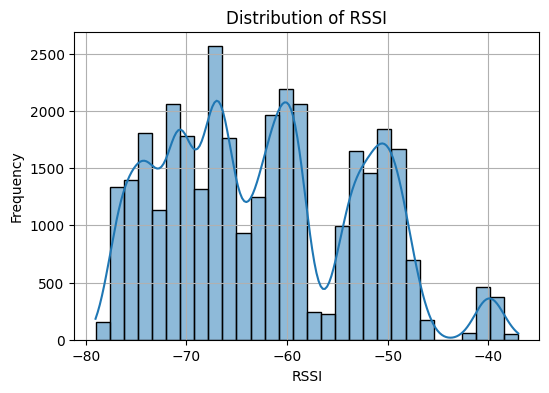

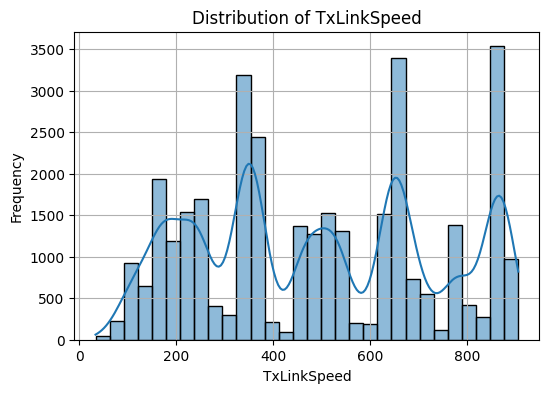

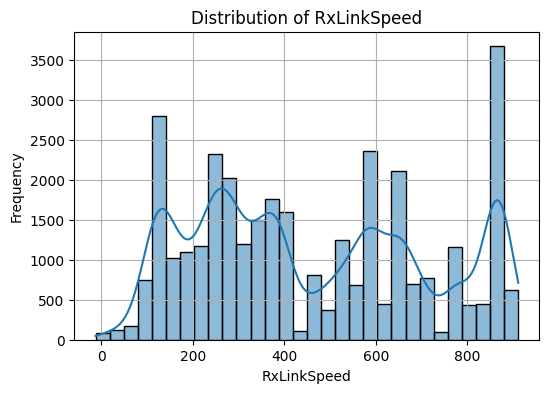

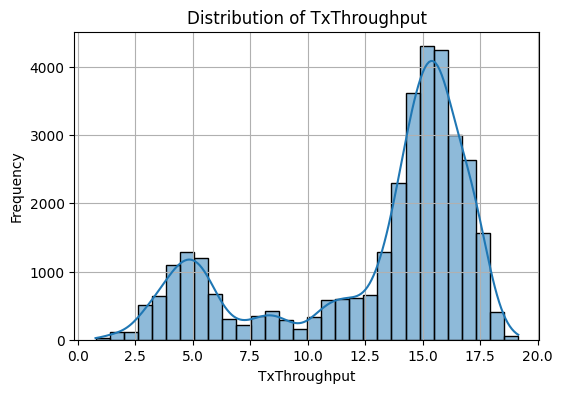

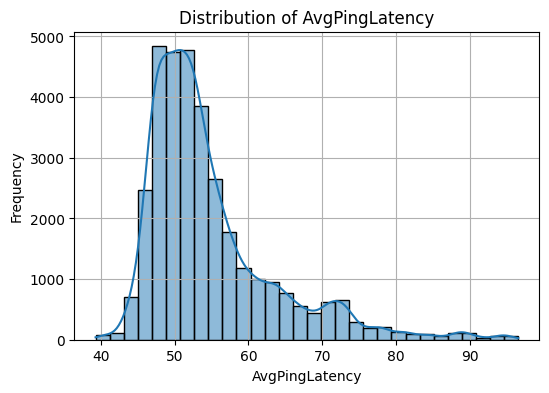

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of numerical features
print("Statistical Summary (Train Set):")
display(train_df.describe())

# List of key features
features = ['RSSI', 'TxLinkSpeed', 'RxLinkSpeed', 'TxThroughput', 'AvgPingLatency']

# Plot histograms
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


To analyse the data we chose as the main parameters of the dataset: RSSI, TxLinkSpeed, RxLinkSpeed, MainAPConnect, TxThroughput, and AvgPingLatency. These parameters were selected because they either describe the physical/link-layer conditions of the connection (e.g., signal strength, transmission speeds) or they are the key performance indicators (throughput and latency) that our model aims to predict.

The RSSI values range from -79 dBm to -37 dBm, with a mean of approximately -62.4 dBm. This indicates that the average signal quality across the samples is moderate to weak, which can be expected in residential environments with physical obstacles. The RSSI distribution is notably multimodal since there are multiple peaks in the frequency graph,  suggesting distinct clusters of measurements possibly corresponding to different zones or connection types (e.g., near vs. far from access points).

Both TxLinkSpeed (transmission speed from AP to STA) and RxLinkSpeed (from STA to AP) show a wide range of values — from around 30 Mbps to over 900 Mbps. The mean link speeds are fairly high (≈491 Mbps for Tx and ≈461 Mbps for Rx), pointing to generally good-quality Wi-Fi hardware, likely supporting standards like Wi-Fi 5 or 6. However, the presence of outliers — including a negative RxLinkSpeed value — indicates the need for cleaning or clipping during preprocessing. The histograms reveal a multimodal distribution, with spikes at common modulation rates, such as 144 Mbps, 300 Mbps, 433 Mbps, and 866 Mbps.

The MainAPConnect binary feature shows that approximately 91% of connections are made to the main access point rather than to an extender. This imbalance could reflect real usage patterns and may influence performance metrics, as extender connections often yield lower throughput.

The TxThroughput, one of the target metrics, has an average of around 13 Mbps and is  multimodal, with peaks near 5 Mbps and 15 Mbps. This likely reflects differences in quality between extender and main AP connections. Lastly, AvgPingLatency — the other target metric — has a right-skewed distribution with most values between 40 and 60 ms, and a mean of ~54.7 ms. This suggests most connections have moderate latency, though a noticeable long tail may correspond to congested or low-quality connections.


### TASK 2: Perform a correlation analysis between the main features in the dataset and the performance metrics (throughput and delay).

Correlation with TxThroughput:
MainAPConnect    0.321010
RSSI             0.076853
TxLinkSpeed      0.044451
RxLinkSpeed      0.044280
Name: TxThroughput, dtype: float64

Correlation with AvgPingLatency:
MainAPConnect    0.028982
TxLinkSpeed     -0.331170
RxLinkSpeed     -0.361945
RSSI            -0.375971
Name: AvgPingLatency, dtype: float64


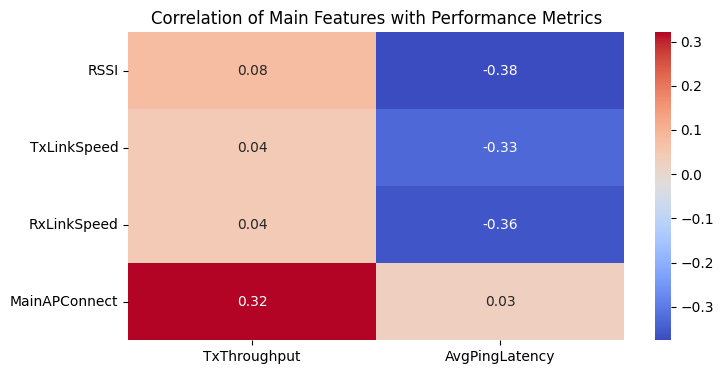

In [4]:
# Define main features and target metrics
features = ['RSSI', 'TxLinkSpeed', 'RxLinkSpeed', 'MainAPConnect']
targets = ['TxThroughput', 'AvgPingLatency']

# Compute correlation matrix for selected columns
selected_cols = features + targets
corr_matrix = train_df[selected_cols].corr()

# Display correlation with targets
print("Correlation with TxThroughput:")
print(corr_matrix['TxThroughput'][features].sort_values(ascending=False))

print("\nCorrelation with AvgPingLatency:")
print(corr_matrix['AvgPingLatency'][features].sort_values(ascending=False))

# Optional: heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix.loc[features, targets], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Main Features with Performance Metrics")
plt.show()



We analyzed the correlations between the four main features we already used before — RSSI, TxLinkSpeed, RxLinkSpeed, and MainAPConnect — and the two performance metrics: TxThroughput and AvgPingLatency.

When looking at TxThroughput (which is the download speed), the strongest correlation is with MainAPConnect (correlation = +0.32), indicating that being connected to the main access point, rather than an extender, moderately improves throughput. This aligns with earlier observations that users on the main AP tend to experience higher speeds. However, RSSI, TxLinkSpeed, and RxLinkSpeed show very weak positive correlations (all around +0.04 to +0.08), suggesting that these parameters are not strong standalone predictors of throughput in this dataset. This could be due to hidden factors like interference, congestion, or limitations of the network infrastructure, which are not captured in those features alone.

In contrast, AvgPingLatency (delay) shows much stronger relationships. The RSSI feature has the strongest negative correlation (−0.38), meaning that better signal strength (less negative RSSI) is associated with lower latency. Similarly, both TxLinkSpeed and RxLinkSpeed have moderately strong negative correlations (−0.33 and −0.36, respectively), suggesting that higher link speeds tend to result in reduced delay. These results make intuitive sense: stronger signals and higher link capacities lead to faster and more stable packet transmission. The MainAPConnect feature, however, has a negligible positive correlation with latency (+0.03), indicating that merely being on the main AP doesn’t significantly reduce delay on its own.

In summary, MainAPConnect stands out as the main driver of higher throughput, while RSSI and link speeds are more relevant for predicting lower latency. These insights should inform the neural network design — perhaps encouraging separate models for throughput and latency, or at least giving different weights to features depending on the prediction task.

## **PART 2**

### TASK 1: Feature selection

In [5]:
features = ['RSSI', 'TxLinkSpeed', 'RxLinkSpeed', 'MainAPConnect']
targets = ['TxThroughput', 'AvgPingLatency']

#Same as before

### TASK 2: Data Preparation

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select input and target data
X_train = train_df[features].values
y_train = train_df[targets].values

X_test = test_df[features].values
y_test = test_df[targets].values

# Normalize inputs and outputs separately
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)



For the data preparation, we decided to use MinMax scaling because it brings all features to the same range [0, 1], which improves neural network training and preserves the relative importance of each feature.

### TASK 3: FNN architecture design

In [9]:
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping

def create_improved_fnn():
    model = models.Sequential([
        layers.Input(shape=(4,)),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss=Huber(),  # Robust to outliers
        metrics=['mae']
    )
    return model

model_throughput = create_improved_fnn()
model_latency = create_improved_fnn()



Initially, we implemented a simple Feedforward Neural Network (FNN) consisting of an input layer with 4 neurons (corresponding to the selected features: RSSI, TxLinkSpeed, RxLinkSpeed, and MainAPConnect), followed by two hidden layers with 16 and 8 neurons, respectively. These layers used the ReLU activation function, with dropout applied to reduce overfitting. The model was compiled using the Mean Squared Error (MSE) loss and the Adam optimizer. This setup provided a lightweight baseline architecture suitable for quick convergence and basic regression tasks.

However, after evaluating the model’s predictions—particularly for throughput—we observed signs of underfitting, with the model producing overly smooth predictions that failed to capture significant variations in the data. Latency predictions were more accurate, but throughput predictions often stayed near the mean and lacked sensitivity to the true spikes and drops in performance.

To address this, we upgraded the model architecture. The improved FNN now includes three hidden layers with 64, 32, and 16 neurons, respectively, all using He initialization and ReLU activations to support deeper learning. Dropout layers with a rate of 0.2 are included after the first two hidden layers to maintain generalization. The model is compiled using the Huber loss, which is more robust to outliers than MSE, and trained using the Adam optimizer. To further enhance generalization and avoid overfitting, EarlyStopping is applied with a patience of 10 epochs and automatic restoration of the best weights.

We also decided to use two separate models: one for predicting TxThroughput and another for AvgPingLatency. This decision was based on our earlier analysis showing that throughput is more strongly influenced by MainAPConnect, while latency is better predicted using RSSI, TxLinkSpeed, and RxLinkSpeed. Separating the models allowed each FNN to focus on the most relevant features for its target. Additionally, for the throughput model, we introduced custom sample weighting during training to give higher importance to low-throughput samples, which were harder to predict and underrepresented in the training data. These changes resulted in improved latency prediction and partial improvements to throughput prediction, highlighting the value of model specialization and informed architecture tuning.

### TASK 4: Train your FNN

In [43]:
# Generate sample weights: higher for low-throughput samples
sample_weights_throughput = np.where(y_train[:, 0] < 10, 2.0, 1.0)



In [44]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_throughput = model_throughput.fit(
    X_train_scaled,
    y_train_scaled[:, 0],  # Target: scaled throughput
    sample_weight=sample_weights_throughput,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

history_latency = model_latency.fit(
    X_train_scaled, y_train_scaled[:, 1],
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0340 - mae: 0.1838 - val_loss: 0.0342 - val_mae: 0.1900
Epoch 2/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0342 - mae: 0.1853 - val_loss: 0.0342 - val_mae: 0.1971
Epoch 3/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0345 - mae: 0.1866 - val_loss: 0.0336 - val_mae: 0.1829
Epoch 4/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0345 - mae: 0.1864 - val_loss: 0.0334 - val_mae: 0.1825
Epoch 5/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0344 - mae: 0.1844 - val_loss: 0.0340 - val_mae: 0.1879
Epoch 6/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0336 - mae: 0.1828 - val_loss: 0.0343 - val_mae: 0.1830
Epoch 7/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0339 - mae: 0.1825 - val_loss: 0.0339 - val_mae: 0.1876
Epoch 8/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0344 - mae: 0.1856 - val_loss: 0.0344 - val_mae: 0.1922
Epoch 9/100
840/840 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/

### TASK 5: Evaluate your FNN

In [45]:
# Predict (scaled outputs)
y_pred_throughput_scaled = model_throughput.predict(X_test_scaled)
y_pred_latency_scaled = model_latency.predict(X_test_scaled)

# Reshape to concatenate
y_pred_combined_scaled = np.hstack([y_pred_throughput_scaled, y_pred_latency_scaled])

# Inverse scale predictions and ground truth
y_pred = y_scaler.inverse_transform(y_pred_combined_scaled)
y_true = y_scaler.inverse_transform(y_test_scaled)


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Throughput
mae_throughput = mean_absolute_error(y_true[:, 0], y_pred[:, 0])
rmse_throughput = np.sqrt(mean_squared_error(y_true[:, 0], y_pred[:, 0]))

# Latency
mae_latency = mean_absolute_error(y_true[:, 1], y_pred[:, 1])
rmse_latency = np.sqrt(mean_squared_error(y_true[:, 1], y_pred[:, 1]))

print(f"Throughput MAE: {mae_throughput:.2f} Mbps")
print(f"Throughput RMSE: {rmse_throughput:.2f} Mbps")

print(f"Latency MAE: {mae_latency:.2f} ms")
print(f"Latency RMSE: {rmse_latency:.2f} ms")


Throughput MAE: 3.39 Mbps
Throughput RMSE: 3.99 Mbps
Latency MAE: 4.62 ms
Latency RMSE: 6.41 ms


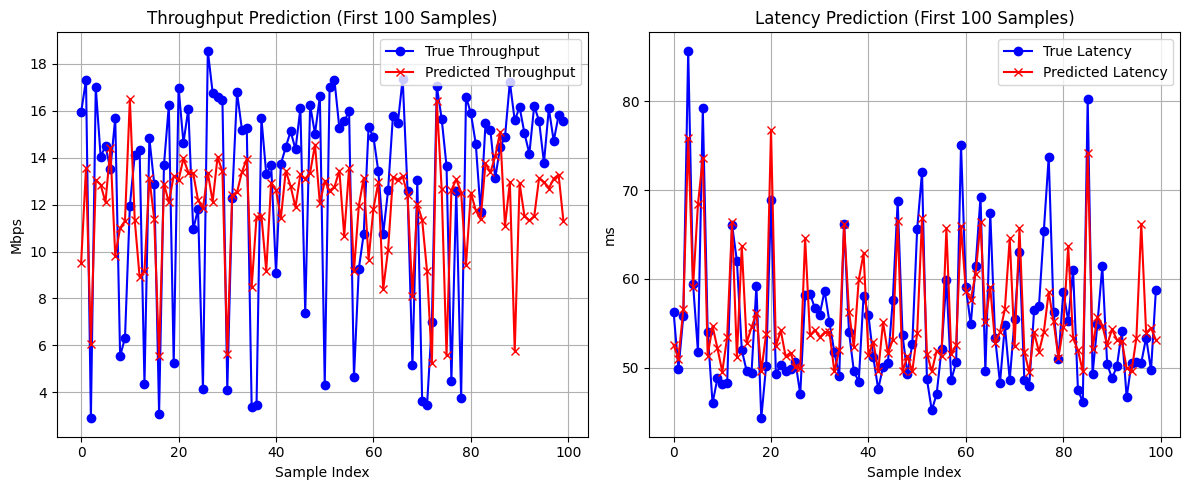

In [33]:
import matplotlib.pyplot as plt

# Limit to first 100 samples for readability
y_true_subset = y_true[:100]
y_pred_subset = y_pred[:100]

plt.figure(figsize=(12, 5))

# Throughput chart
plt.subplot(1, 2, 1)
plt.plot(y_true_subset[:, 0], label='True Throughput', color='blue', marker='o')
plt.plot(y_pred_subset[:, 0], label='Predicted Throughput', color='red', marker='x')
plt.title('Throughput Prediction (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Mbps')
plt.legend()
plt.grid(True)

# Latency chart
plt.subplot(1, 2, 2)
plt.plot(y_true_subset[:, 1], label='True Latency', color='blue', marker='o')
plt.plot(y_pred_subset[:, 1], label='Predicted Latency', color='red', marker='x')
plt.title('Latency Prediction (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('ms')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [48]:
import numpy as np

# Define thresholds (tune these as needed)
throughput_threshold = 5   # e.g. 5 Mbps
latency_threshold = 5      # e.g. 5 ms

# Boolean arrays: True where prediction is "close enough"
throughput_accuracy_mask = np.abs(y_true[:, 0] - y_pred[:, 0]) < throughput_threshold
latency_accuracy_mask = np.abs(y_true[:, 1] - y_pred[:, 1]) < latency_threshold

# Compute accuracy as percentage of correct predictions
throughput_accuracy = np.mean(throughput_accuracy_mask)
latency_accuracy = np.mean(latency_accuracy_mask)

# Print results
print(f"Throughput Accuracy (±{throughput_threshold} Mbps): {throughput_accuracy:.2%}")
print(f"Latency Accuracy (±{latency_threshold} ms): {latency_accuracy:.2%}")


Throughput Accuracy (±5 Mbps): 79.92%
Latency Accuracy (±5 ms): 68.14%


The final evaluation of the two separate neural networks reveals a clear distinction in predictive performance between throughput and latency. For throughput, the model achieved a Mean Absolute Error (MAE) of 3.39 Mbps and a Root Mean Squared Error (RMSE) of 3.99 Mbps, suggesting that predictions deviate by around 3.39 Mbps on average from the actual values. To complement these metrics, we also computed a custom accuracy, defined as the percentage of predictions within ±5 Mbps of the true value. The model reached a Throughput Accuracy of 79.92%, indicating that the majority of predictions fall within an acceptable error margin. While the model still underestimates sharp variations, this accuracy score confirms a reasonably consistent performance in practical terms.

For latency, the model achieved an MAE of 4.62 ms and an RMSE of 6.41 ms, showing strong average prediction quality. However, when applying the same ±5 ms custom accuracy metric, the model attained a Latency Accuracy of 68.14%, meaning it was within that range in just over two-thirds of the cases. This slightly lower accuracy compared to throughput reflects the presence of a few larger deviations, especially for high-latency outliers, despite the generally well-aligned prediction curve observed in the plots.

In summary, the throughput model shows robust consistency across most samples, while the latency model, although slightly less consistent under the custom threshold, performs very well in capturing broader trends and variability. These results highlight the strengths of your improved FNN architecture and training strategy, especially when paired with tailored evaluation metrics.